In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import itertools
import scipy.stats as ss
from scipy.stats import pearsonr

%matplotlib inline


from string import ascii_letters

##ML
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn import datasets
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate


##Classifiers
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


In [25]:
##Load thee dataset
df_original = pd.read_csv('./loan-10k.lrn.csv')

df_original.set_index('ID', inplace=True)
df_original.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
ID,,,,,,,,,,,,,,,,,,,,,
24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,Not Verified,...,N,6,2018,6,2000,2,2019,2,2019,A
67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,Source Verified,...,N,10,2015,9,1984,2,2019,2,2019,E
35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,Not Verified,...,N,9,2017,10,2006,1,2018,11,2018,D
4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,Source Verified,...,N,0,2015,6,1996,6,2016,9,2017,C
59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,Source Verified,...,N,11,2016,0,2002,2,2019,2,2019,C


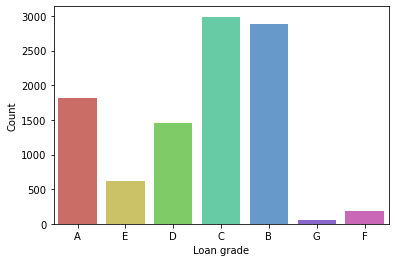

In [26]:
#Plot the target variable
sns.countplot(x='grade', data=df_original, palette='hls')
#Name x axis
plt.xlabel('Loan grade')
#Name y axis
plt.ylabel('Count')
plt.show()


In [27]:
#Print number of rows and columns
print(df_original.shape)
#print every columns name and their data types in a list
for col in df_original.columns:
    print(col, df_original[col].dtype)



(10000, 91)
loan_amnt float64
funded_amnt float64
funded_amnt_inv float64
term object
int_rate float64
installment float64
emp_length object
home_ownership object
annual_inc float64
verification_status object
loan_status object
pymnt_plan object
purpose object
addr_state object
dti float64
delinq_2yrs float64
fico_range_low float64
fico_range_high float64
inq_last_6mths float64
open_acc float64
pub_rec float64
revol_bal float64
revol_util float64
total_acc float64
initial_list_status object
out_prncp float64
out_prncp_inv float64
total_pymnt float64
total_pymnt_inv float64
total_rec_prncp float64
total_rec_int float64
total_rec_late_fee float64
recoveries float64
collection_recovery_fee float64
last_pymnt_amnt float64
last_fico_range_high float64
last_fico_range_low float64
collections_12_mths_ex_med float64
policy_code float64
application_type object
acc_now_delinq float64
tot_coll_amt float64
tot_cur_bal float64
total_rev_hi_lim float64
acc_open_past_24mths float64
avg_cur_bal float6

<AxesSubplot:>

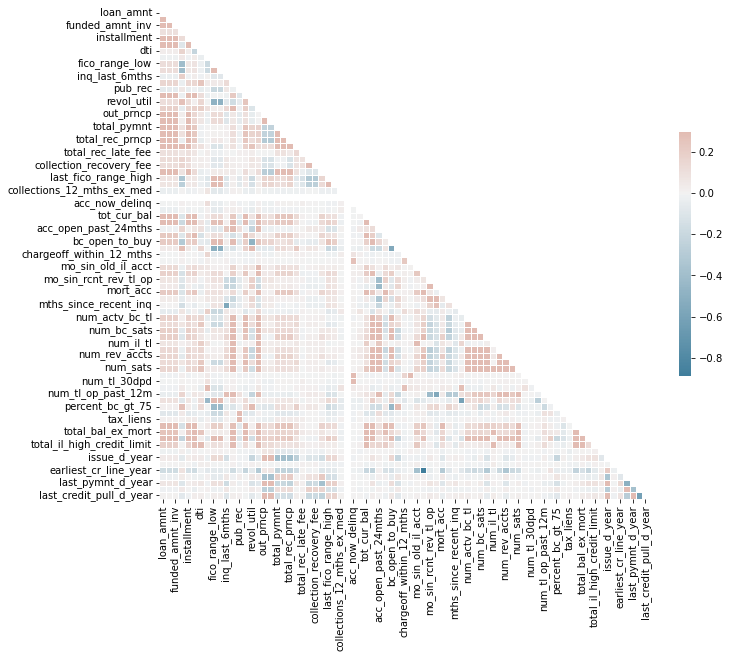

In [28]:
corr = df_original.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
            
            

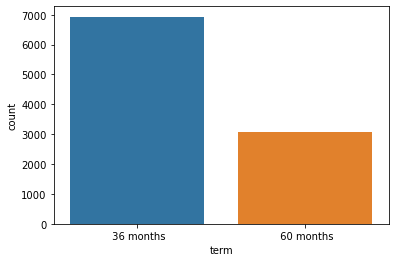

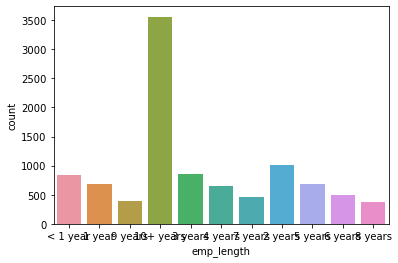

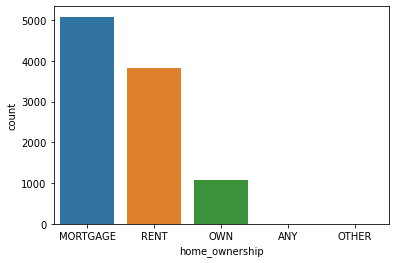

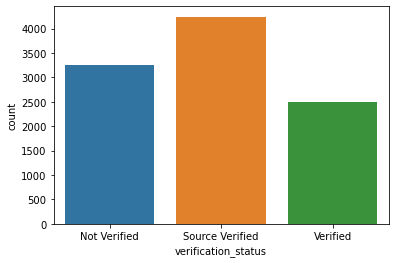

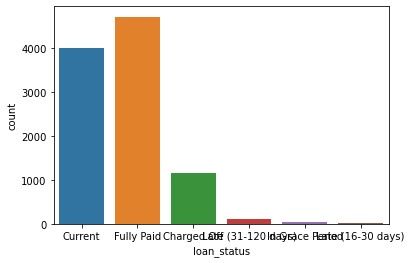

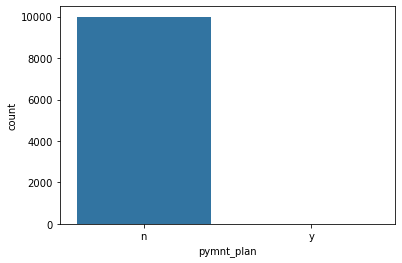

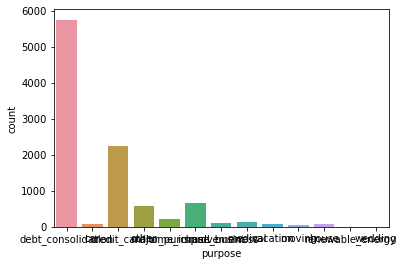

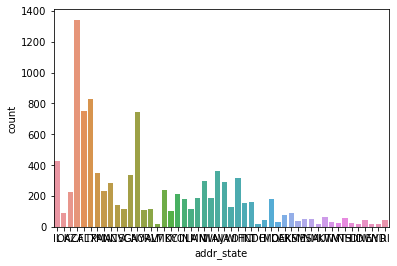

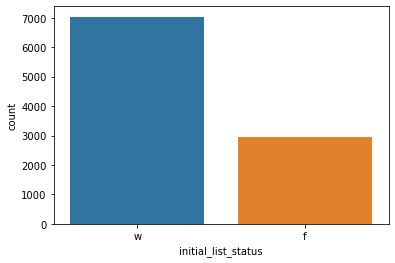

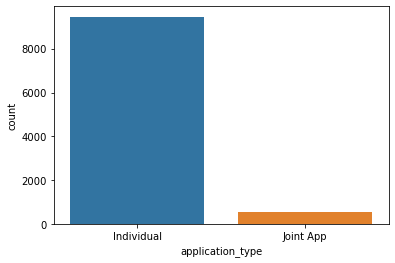

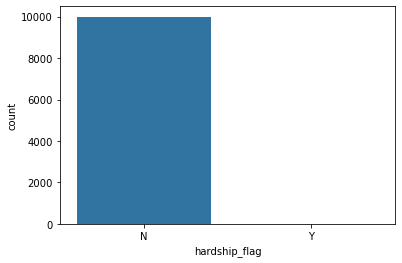

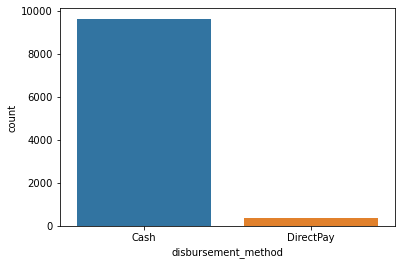

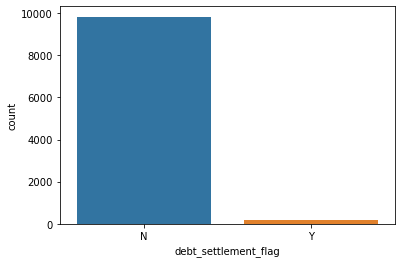

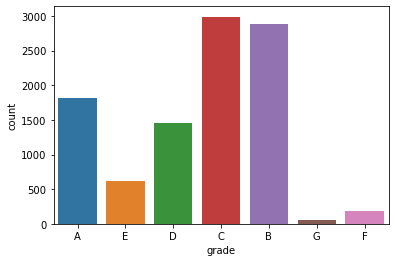

In [29]:
#Plot the distribution of every column of type object
for col in df_original.columns:
    if df_original[col].dtype == 'object':
        sns.countplot(x=col, data=df_original)
        plt.show()
        

# Splitting

In [30]:
df = df_original.copy()

y = df['grade']
df.drop('grade', axis=1, inplace=True)

#Create a X variable with the features
X = df


# Preprocessing


In [31]:
#Encode the column "emp_leght" to numeric values usind the LabelEncoder
le = LabelEncoder()
X['emp_length'] = le.fit_transform(X['emp_length'].astype(str))
X['emp_length'].astype(float)

ID
24341    10.0
67534     0.0
35080    10.0
4828      9.0
59259     0.0
         ... 
6644      5.0
25910     1.0
95698    10.0
27371     0.0
8729      1.0
Name: emp_length, Length: 10000, dtype: float64

In [32]:
#Get cateogrical columns
cat_cols = X.select_dtypes(include=['object']).columns
cat_cols

#Do one hot encoding for the categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [33]:
print(X.shape)
X.head()
print(y.shape)

(10000, 157)
(10000,)


In [34]:
#Merge X and y together for exporting
export = pd.concat([X, y], axis=1)
#Rename y to target
export.rename(columns={'grade':'target'}, inplace=True)
#Set ID to index
export.head()

df = export.copy()

#Export the dataset
#export.to_csv('../finale/preprocessed-datasets/loan-prepro.csv', index=True)

# THIS NOTEBOOK FINISHES HERE FOR THE SUBMISSION

We continue to work on it in the main notebook. Following some initial attemps for the Kaggle competition

In [35]:


#Scale the numerical columns
scaler = StandardScaler()

#Transform all columns to float
X = X.astype(float)

#Drop the column "home_ownership_OTHER" "home_ownership_NONE" "loan_status_Default" from the dataset
X.drop(['home_ownership_OTHER'], axis=1, inplace=True)

y = LabelEncoder().fit_transform(y)

#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Function the create the model and print the f1 mean score and deviation
def create_model(model, X_train, y_train, X_test, y_test):
    X_train = scaler.fit_transform(X_train)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    print("F1 Mean: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Accuracy: %0.2f" % metrics.accuracy_score(y_test, y_pred))
    print("F1 Score: %0.2f" % metrics.f1_score(y_test, y_pred, average='macro'))
    print("Precision: %0.2f" % metrics.precision_score(y_test, y_pred, average='macro'))
    print("Recall: %0.2f" % metrics.recall_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
    return model

#Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
    
        print(cm)
    
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
    
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

#Function to plot the feature importance
def plot_feature_importance(model, X_train):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()
    







In [36]:
X_test.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
ID,,,,,,,,,,,,,,,,,,,,,
91267,9850.0,9850.0,9850.0,16.29,347.71,9.0,62000.00,23.19,1.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63117,20000.0,20000.0,20000.0,13.65,461.75,5.0,55365.00,21.07,0.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53723,12000.0,12000.0,12000.0,14.08,410.60,1.0,94000.00,19.18,0.0,670.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
73427,28000.0,28000.0,28000.0,6.49,858.05,2.0,160000.00,12.60,3.0,710.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54934,6000.0,6000.0,6000.0,9.93,193.41,4.0,24000.00,17.20,0.0,770.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67919,14500.0,14500.0,14500.0,6.24,442.70,1.0,35000.00,15.02,0.0,710.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17967,28000.0,28000.0,28000.0,17.10,697.38,6.0,86000.00,16.59,0.0,670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7201,18000.0,18000.0,18000.0,6.11,548.50,2.0,85000.00,19.24,0.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71206,4900.0,4900.0,4900.0,11.05,160.54,4.0,27000.00,16.00,0.0,740.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Add every type of SVM classifier to a list
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
]

In [38]:
#Iterate through the classifiers and print the f1 mean score and deviation
for model in [DecisionTreeClassifier()]:
    print(model)
    create_model(model, X_train, y_train, X_test, y_test)
 

DecisionTreeClassifier()


/Users/kristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


F1 Mean: 0.93 (+/- 0.02)
Accuracy: 0.01
F1 Score: 0.00
Precision: 0.00
Recall: 0.14
Confusion Matrix: 
 [[  0   0   0   0   0   0 357]
 [  0   0   0   0   0   0 581]
 [  0   0   0   0   0   0 587]
 [  0   0   0   0   0   0 293]
 [  0   0   0   0   0   0 133]
 [  0   0   0   0   0   0  35]
 [  0   0   0   0   0   0  14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.00      0.00      0.00       581
           2       0.00      0.00      0.00       587
           3       0.00      0.00      0.00       293
           4       0.00      0.00      0.00       133
           5       0.00      0.00      0.00        35
           6       0.01      1.00      0.01        14

    accuracy                           0.01      2000
   macro avg       0.00      0.14      0.00      2000
weighted avg       0.00      0.01      0.00      2000



/Users/kristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kristian/opt/ana

In [39]:
#scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer(), MaxAbsScaler()]

## Making predictions

In [40]:
#Load test dataset for predictions
test_df = pd.read_csv('loan-10k.tes.csv')

#Set the index
test_df.set_index('ID', inplace=True)

test_df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
ID,,,,,,,,,,,,,,,,,,,,,
3582,10000.0,10000.0,10000.0,36 months,9.93,322.35,< 1 year,MORTGAGE,130000.0,Not Verified,...,Cash,N,9,2017,8,2006,2,2019,2,2019
60498,20000.0,20000.0,20000.0,60 months,13.67,461.96,10+ years,MORTGAGE,75500.0,Not Verified,...,Cash,N,3,2016,3,2002,0,2018,2,2019
53227,15000.0,15000.0,15000.0,36 months,11.80,496.79,< 1 year,RENT,38000.0,Source Verified,...,Cash,N,11,2018,9,2004,2,2019,2,2019
21333,12500.0,12500.0,12500.0,36 months,15.31,435.22,10+ years,MORTGAGE,65000.0,Source Verified,...,Cash,N,4,2013,10,1996,4,2016,2,2018
3885,19000.0,19000.0,19000.0,60 months,27.88,590.21,6 years,MORTGAGE,38000.0,Verified,...,Cash,N,10,2015,1,2001,4,2016,2,2019


In [41]:
#Get the categorical columns
cat_cols = test_df.select_dtypes(include=['object']).columns

#Get the numerical columns
num_cols = test_df.select_dtypes(include=['int64', 'float64']).columns

le = LabelEncoder()
test_df['emp_length'] = le.fit_transform(test_df['emp_length'].astype(str))
test_df['emp_length'].astype(float)

#Do one hot encoding for the categorical columns
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

#Transform all columns to float64
test_df = test_df.astype('float64')



#Drop columns home_ownership_NONE\n- loan_status_Default from the dataset
test_df.drop(['home_ownership_NONE', 'loan_status_Default'], axis=1, inplace=True)



In [42]:
#Make predictions for the test dataset
predictions = model.predict(test_df)

#Create a dataframe with the predictions
predictions_df = pd.DataFrame(predictions, columns=['grade'])
predictions_df.set_index(test_df.index, inplace=True)
predictions_df.head(20)

#Export to csv
predictions_df.to_csv('predictions.csv')





/Users/kristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 165 features, but DecisionTreeClassifier is expecting 156 features as input.